<a href="https://colab.research.google.com/github/felixzhao/AIML425-ASSN-3/blob/main/notebooks/Q2_AIML425_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 14.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910454 sha256=0f4c20d26a4906f9b7f1e97fb78621cc4b11cdcc3686a3a20afef81d3261a917
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch-geometric


In [6]:
!pip install --upgrade networkx

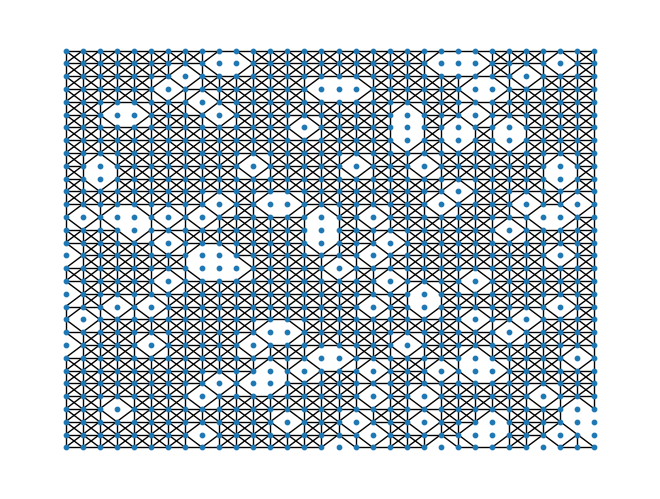

In [5]:
import torch
import random
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data
from scipy.sparse import csr_matrix

# Grid dimensions
n = 32  # 32x32 grid
N = n * n  # Total number of sensors

# Failure rate
F = 0.1  # For example, 10% failure rate

# Generate grid with failures
grid = torch.ones(n, n)
for i in range(n):
    for j in range(n):
        if random.random() < F:
            grid[i, j] = 0  # Sensor failed

# Create adjacency matrix
adj_matrix = torch.zeros(N, N)
for i in range(n):
    for j in range(n):
        if grid[i, j] == 0:  # Skip failed sensors
            continue
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue  # Skip self-loop
                x, y = i + dx, j + dy
                if 0 <= x < n and 0 <= y < n and grid[x, y] == 1:
                    index1 = i * n + j
                    index2 = x * n + y
                    adj_matrix[index1, index2] = 1

# Convert to PyTorch Geometric Data
edge_index = adj_matrix.nonzero().t().contiguous()
data = Data(edge_index=edge_index)

# Convert to SciPy sparse matrix
adj_matrix_numpy = adj_matrix.numpy()
adj_matrix_sparse = csr_matrix(adj_matrix_numpy)

# To visualize the graph, we convert it to a networkx graph and plot
G = nx.from_scipy_sparse_array(adj_matrix_sparse)  # Using from_scipy_sparse_array
pos = {i: [(i // n) % n, i % n] for i in range(N)}
nx.draw(G, pos, node_size=10)
plt.show()
